trump
*************************Show the 5 recent tweets:******************************

1) RT @SenKamalaHarris: Unacceptable that no one from the Trump administration came before the Homeland Security committee today to discuss th…

2) RT @hanke_ray: We know that is a rhetorical question..nonetheless, since you brought it up: no.

As to trump bringing in competent people?…

3) RT @Liberty2Bfree: @JustJay0109 @CassieLenelle @maddow Trump MUST BE REMOVED FOR BEING COMPLETELY INSANE OR GROSS NEGLIGENCE OVER THIS!

4) @LindseyBoylan According to this website, https://t.co/0kvbZgr61y NY already passed the 2,000 mark...
☠️☠️☠️
It's unsurprising but still disappointing to say the least that tRump can't focus on doing the job instead of attacking media and politicians. https://t.co/dWNhRLTwYe

5) @EricksonReal @tedlieu @benshapiro @SpeakerPelosi @POTUS And tell me how many Americans died from her ripping his speech? None. How many have died from Trump’s inaction and calling it a hoax?  Thousan

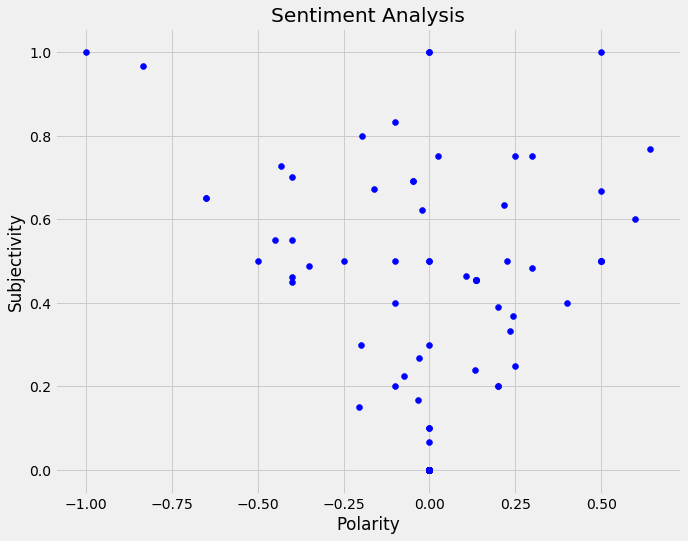

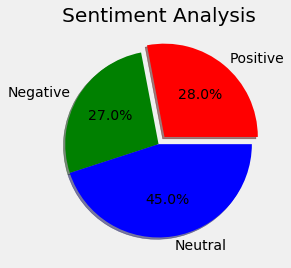

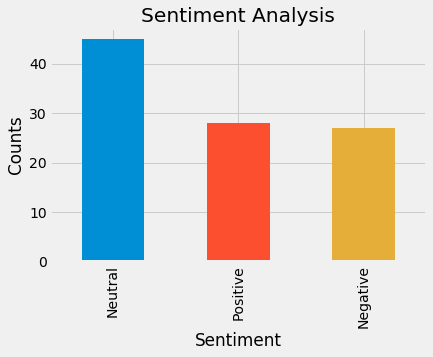

***************************************************Printing positive tweets:*************************************************

1) _ray: We know that is a rhetorical question..nonetheless, since you brought it up: no.

As to trump bringing in competent people?…

2)      And tell me how many Americans died from her ripping his speech? None. How many have died from Trump’s inaction and calling it a hoax?  Thousands.

3) 1: RazorTrain 1856
🇺🇸Add-On Patriot Train

👉So many members of Congress have become filthy rich while NOT doing their job. P…

4)  _ash233   No I’d rather a clueless, senile, old man who belongs in an old people home and doesn’t even know where he is. Can’t tell his sister and wife apart. Thinks he’s running for senate. Trump loves America and we love him.

5) : Interesting. All Progressive channels covering Cuomo, Governor but not Trump, President. Get it?

6) : One of Trump’s advisers said he “took a gamble” that warm weather would stop the coronavirus. Before we let the

In [4]:
import tweepy 
import re
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

consumerKey = 'Enter your the consumerKey'
consumerSecret = 'Enter your the consumerSecret'
accessToken = 'Enter your the accessToken'
accessTokenSecret = 'Enter your the accessTokenSecret'

# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)



posts = api.search(input(),  count = 100, lang ="en", tweet_mode="extended")
# Extract 100 tweets from the twitter user
#posts = api.user_timeline(screen_name="coronavirus", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("*************************Show the 5 recent tweets:******************************\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head() 

# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'


df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the dataframe
df


 # Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
positive=round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
negative=round( (ntweets.shape[0] / df.shape[0]) * 100, 1)


# Print the percentage of nuteral tweets
nutweets = df[df.Analysis == 'Neutral']
nutweets = nutweets['Tweets']
neutral=round( (nutweets.shape[0] / df.shape[0]) * 100, 1)
print(neutral)



 # Plotting
plt.figure(figsize=(10,8))
for i in range(0, df.shape[0]):
 plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') # plt.scatter(x,y,color)
 
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()



# Plotting pie graph
sli = [positive,negative,neutral]
activities = ['Positive','Negative','Neutral']
cols = ['r','g','b']
plt.pie(sli, labels=activities, colors=cols, shadow= True, explode=(0.1,0,0), autopct='%1.1f%%')
plt.title('Sentiment Analysis')
plt.show()

# Show the value counts
df['Analysis'].value_counts()

# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()


# Printing positive tweets 
print('***************************************************Printing positive tweets:*************************************************\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

# Printing negative tweets  
print('\n\n\n\n\n\n\n\n\n\n*************************************************Printing negative tweets:*****************************************************\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

# Printing nuteral tweets  
print('\n\n\n\n\n\n\n\n\n\n********************************************************Printing nuteral tweets:*****************************************************\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Neutral'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1
    